<a href="https://colab.research.google.com/github/nazrulislam3626/IFRS-9-Expected-Credit-Loss-ECL-Modeling-using-Advanced-Machine-Learning/blob/main/IFRS_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Upload dataset from Github
df = pd.read_csv('https://raw.githubusercontent.com/LEARNEREA/Data_Science/main/Data/credit_risk_dataset.csv')

In [ ]:
# Read raw dataset
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# checking dataset information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Describing dataset with basic statestical techniques of numerial features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
# describe include object
df.describe(include='object')


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
# inspect any null values
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
# Found 895 observatoions under person_emp_length and 3116 (almost 10%) under loan_int_rate

In [ ]:
# keep a copy original dataset
df1 = df.copy()

In [ ]:
# imputing nul values of person_emp_length (895 observatoions) : strategy = median (4)
df1['person_emp_length'] = df1['person_emp_length'].fillna(df1['person_emp_length'].median())

In [ ]:
# imputing nul values of loan_int_rate (3116 (almost 10%):strategy = median (10.99)
df1['loan_int_rate'] = df1['loan_int_rate'].fillna(df1['loan_int_rate'].median())

In [ ]:
df1.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
# calculate and treat outliers for person_age ( extreme value 114 years)
Q1 = df1['person_age'].quantile(0.25)
Q3 = df1['person_age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1['person_age'] = np.where(df1['person_age'] < lower_bound, lower_bound, df1['person_age'])
df1['person_age'] = np.where(df1['person_age'] > upper_bound, upper_bound, df1['person_age'])

In [ ]:
# Ensure columns are numeric before quantile calculation
df1['loan_int_rate'] = pd.to_numeric(df1['loan_int_rate'], errors='coerce')
df1['cb_person_cred_hist_length'] = pd.to_numeric(df1['cb_person_cred_hist_length'], errors='coerce')
# Handle any NaNs introduced by coerce (if non-numeric values were present)
df1['loan_int_rate'] = df1['loan_int_rate'].fillna(df1['loan_int_rate'].median())
df1['cb_person_cred_hist_length'] = df1['cb_person_cred_hist_length'].fillna(df1['cb_person_cred_hist_length'].median())

# Outlier treatment for loan_int_rate (having Max value 30%)
Q1_rate = df1['loan_int_rate'].quantile(0.25)
Q3_rate = df1['loan_int_rate'].quantile(0.75)
IQR_rate = Q3_rate - Q1_rate
lower_bound_rate = Q1_rate - 1.5 * IQR_rate
upper_bound_rate = Q3_rate + 1.5 * IQR_rate
df1['loan_int_rate'] = np.where(df1['loan_int_rate'] < lower_bound_rate, lower_bound_rate, df1['loan_int_rate'])
df1['loan_int_rate'] = np.where(df1['loan_int_rate'] > upper_bound_rate, upper_bound_rate, df1['loan_int_rate'])

# Outlier treatment for cb_person_cred_hist_length (credit hist. 30 years)
Q1_hist = df1['cb_person_cred_hist_length'].quantile(0.25)
Q3_hist = df1['cb_person_cred_hist_length'].quantile(0.75)
IQR_hist = Q3_hist - Q1_hist
lower_bound_hist = Q1_hist - 1.5 * IQR_hist
upper_bound_hist = Q3_hist + 1.5 * IQR_hist
df1['cb_person_cred_hist_length'] = np.where(df1['cb_person_cred_hist_length'] < lower_bound_hist, lower_bound_hist, df1['cb_person_cred_hist_length'])
df1['cb_person_cred_hist_length'] = np.where(df1['cb_person_cred_hist_length'] > upper_bound_hist, upper_bound_hist, df1['cb_person_cred_hist_length'])

# Outlier treatment for person_emp_length (person employee length 123 years)
Q1_emp = df1['person_emp_length'].quantile(0.25)
Q3_emp = df1['person_emp_length'].quantile(0.75)
IQR_emp = Q3_emp - Q1_emp
lower_bound_emp = Q1_emp - 1.5 * IQR_emp
upper_bound_emp = Q3_emp + 1.5 * IQR_emp
df1['person_emp_length'] = np.where(df1['person_emp_length'] < lower_bound_emp, lower_bound_emp, df1['person_emp_length'])
df1['person_emp_length'] = np.where(df1['person_emp_length'] > upper_bound_emp, upper_bound_emp, df1['person_emp_length'])


In [ ]:
# Describing dataset after outliers treatments
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.440625,5.271083,20.00,23.00,26.00,30.00,40.50
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.682192,3.717753,0.00,2.00,4.00,7.00,14.50
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.007797,3.075852,5.42,8.49,10.99,13.11,20.04
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.705779,3.710454,2.00,3.00,4.00,8.00,15.50


In [ ]:
df1.shape

(32581, 12)

In [ ]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3.0
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2.0
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3.0
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2.0
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4.0


In [ ]:
# Checking categorical cloumns value couts
df1['person_home_ownership'].value_counts()


,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [ ]:
# Calculate and rename column the default probability (based on loan status_mean) for each home ownership type
home_ownership_default_prob = df1.groupby('person_home_ownership')['loan_status'].mean().reset_index()
home_ownership_default_prob.rename(columns={'loan_status': 'home_ownership_default_prob'}, inplace=True)

# Map these probabilities back to the original DataFrame
df1 = df1.merge(home_ownership_default_prob, on='person_home_ownership', how='left')

# Display the new column and its relationship with the original column
display(df1[['person_home_ownership', 'home_ownership_default_prob']].head())

,person_home_ownership,home_ownership_default_prob
0,RENT,0.315700
1,OWN,0.074690
2,MORTGAGE,0.125707
3,RENT,0.315700
4,RENT,0.315700


In [ ]:
# checking loan_intent value count
df1['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6453
MEDICAL,6071
VENTURE,5719
PERSONAL,5521
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


In [ ]:
# Calculate the default probability for each loan_intent type
loan_intent_default_prob = df1.groupby('loan_intent')['loan_status'].mean().reset_index()
loan_intent_default_prob.rename(columns={'loan_status': 'loan_intent_default_prob'}, inplace=True)

# Map these probabilities back to the original DataFrame
df1 = df1.merge(loan_intent_default_prob, on='loan_intent', how='left')

# Display the new column and its relationship with the original column
display(df1[['loan_intent', 'loan_intent_default_prob']].head())

,loan_intent,loan_intent_default_prob
0,PERSONAL,0.198877
1,EDUCATION,0.172168
2,MEDICAL,0.267007
3,MEDICAL,0.267007
4,MEDICAL,0.267007


In [ ]:
# checking loan grade count
df1['loan_grade'].value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


In [ ]:
# applying the Weight of Evidence (WoE) mapping to the loan_grade column in df1 to create the Grade_WoE column.
#WoE=ln(%Good/%Bad)

grade_woe_map = {
    "A": 1.79,
    "B": 1.14,
    "C": 0.51,
    "D": -0.51,
    "E": -1.27,
    "F": -1.61,
    "G": -1.61
}

df1["Grade_WoE"] = df1["loan_grade"].map(grade_woe_map)

In [ ]:
# showing new column of woe
df1['Grade_WoE']

,Grade_WoE
0,-0.51
1,1.14
2,0.51
3,0.51
4,0.51
...,...
32576,0.51
32577,1.79
32578,1.14
32579,1.14


In [ ]:
# showing loan grade and Grade_woe
df1[['loan_grade', 'Grade_WoE']].head()

,loan_grade,Grade_WoE
0,D,-0.51
1,B,1.14
2,C,0.51
3,C,0.51
4,C,0.51


In [ ]:
# checking loan_status(y), indicating imbalance of outcomes and requiring Augmentation
df1['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


In [ ]:
# Raw data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Data after features engineering (mapping, woe, PD)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  float64
 1   person_income                32581 non-null  int64  
 2   person_home_ownership        32581 non-null  object 
 3   person_emp_length            32581 non-null  float64
 4   loan_intent                  32581 non-null  object 
 5   loan_grade                   32581 non-null  object 
 6   loan_amnt                    32581 non-null  int64  
 7   loan_int_rate                32581 non-null  float64
 8   loan_status                  32581 non-null  int64  
 9   loan_percent_income          32581 non-null  float64
 10  cb_person_default_on_file    32581 non-null  object 
 11  cb_person_cred_hist_length   32581 non-null  float64
 12  home_ownership_default_prob  32581 non-null  float64
 13  loan_intent_defa

In [ ]:
# keep a copy of df1
df2 = df1.copy()

In [ ]:
# Checking df2
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
0,22.0,59000,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3.0,0.315700,0.198877,-0.51
1,21.0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2.0,0.074690,0.172168,1.14
2,25.0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3.0,0.125707,0.267007,0.51
3,23.0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2.0,0.315700,0.267007,0.51
4,24.0,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4.0,0.315700,0.267007,0.51


In [ ]:
# keep a copy of df2
df3 = df2.copy()

In [ ]:
# drop all original categorical columns and redundant probability columns
# It's better practice to assign the result of drop to a new DataFrame without inplace=True
# Drop original categorical columns
columns_to_drop = ['person_home_ownership', 'loan_intent', 'loan_grade']
# Also drop redundant probability columns if they exist (suffixes _x and _y are likely from merge conflicts)
redundant_prob_cols = [col for col in df2.columns if col.startswith('home_ownership_default_prob_') and col != 'home_ownership_default_prob']
columns_to_drop.extend(redundant_prob_cols)

df3 = df2.drop(columns=columns_to_drop, axis=1, errors='ignore') # Use errors='ignore' to prevent error if cols don't exist
display(df3.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
0,22.0,59000,14.5,35000,16.02,1,0.59,Y,3.0,0.315700,0.198877,-0.51
1,21.0,9600,5.0,1000,11.14,0,0.10,N,2.0,0.074690,0.172168,1.14
2,25.0,9600,1.0,5500,12.87,1,0.57,N,3.0,0.125707,0.267007,0.51
3,23.0,65500,4.0,35000,15.23,1,0.53,N,2.0,0.315700,0.267007,0.51
4,24.0,54400,8.0,35000,14.27,1,0.55,Y,4.0,0.315700,0.267007,0.51


In [ ]:
# splitting df3 into x and y (outcome)
x = df3.drop('loan_status', axis=1)
y = df3['loan_status']
display(x.head())
display(y.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
0,22.0,59000,14.5,35000,16.02,0.59,Y,3.0,0.315700,0.198877,-0.51
1,21.0,9600,5.0,1000,11.14,0.10,N,2.0,0.074690,0.172168,1.14
2,25.0,9600,1.0,5500,12.87,0.57,N,3.0,0.125707,0.267007,0.51
3,23.0,65500,4.0,35000,15.23,0.53,N,2.0,0.315700,0.267007,0.51
4,24.0,54400,8.0,35000,14.27,0.55,Y,4.0,0.315700,0.267007,0.51


,loan_status
0,1
1,0
2,1
3,1
4,1


In [ ]:
# y value counts
y.value_counts()

,count
loan_status,
0,25473
1,7108


<Axes: xlabel='loan_status'>

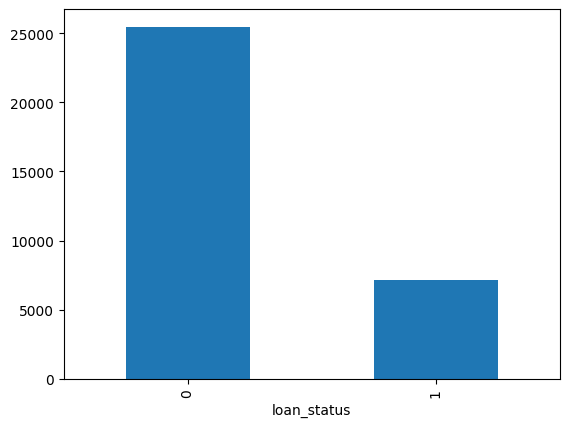

In [ ]:
# show in bar chart (Imbalance y)
y.value_counts().plot(kind='bar')

In [ ]:
!pip install Augmentor

In [ ]:
# Augmentation
import Augmentor


In [ ]:
!pip install imblearn

Now that `imblearn` is installed, let's apply SMOTE to your training data. SMOTE generates synthetic samples for the minority class to balance the class distribution.

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Class distribution before SMOTE: {Counter(y_train)}")

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution before SMOTE: Counter({0: 20401, 1: 5663})
Class distribution after SMOTE: Counter({0: 20401, 1: 20401})


<Axes: xlabel='loan_status'>

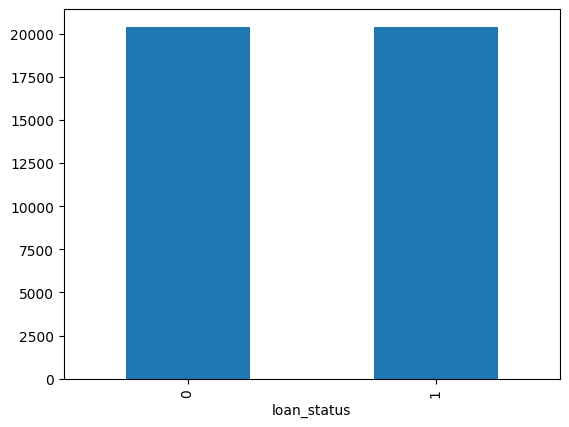

In [62]:
# Show in barchart after applying SMOTE (unsampling)
y_train_res.value_counts().plot(kind='bar')

Now, the number of samples for both classes in `y_train_res` is equal, indicating that the dataset is balanced. I use `X_train_res` and `y_train_res` for training your models to mitigate the class imbalance issue.

In [ ]:
# This cell is now redundant as encoding is handled before train-test split.
# It can be removed or left as is, but its functionality is now incorporated elsewhere.

In [ ]:
# converting categorial data for using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
display(df3.head())    # after LabelEncoding

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
0,22.0,59000,14.5,35000,16.02,1,0.59,Y,3.0,0.315700,0.198877,-0.51
1,21.0,9600,5.0,1000,11.14,0,0.10,N,2.0,0.074690,0.172168,1.14
2,25.0,9600,1.0,5500,12.87,1,0.57,N,3.0,0.125707,0.267007,0.51
3,23.0,65500,4.0,35000,15.23,1,0.53,N,2.0,0.315700,0.267007,0.51
4,24.0,54400,8.0,35000,14.27,1,0.55,Y,4.0,0.315700,0.267007,0.51


In [ ]:
# train, test split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder if not already initialized
label_encoder = LabelEncoder()

# Encode the 'cb_person_default_on_file' column to numerical values
x['cb_person_default_on_file'] = label_encoder.fit_transform(x['cb_person_default_on_file'])
display(x.head()) # after label encoding of cb_person_default

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
0,22.0,59000,14.5,35000,16.02,0.59,1,3.0,0.315700,0.198877,-0.51
1,21.0,9600,5.0,1000,11.14,0.10,0,2.0,0.074690,0.172168,1.14
2,25.0,9600,1.0,5500,12.87,0.57,0,3.0,0.125707,0.267007,0.51
3,23.0,65500,4.0,35000,15.23,0.53,0,2.0,0.315700,0.267007,0.51
4,24.0,54400,8.0,35000,14.27,0.55,1,4.0,0.315700,0.267007,0.51


In [ ]:
# splitting x and y into train and test ( 80% and 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
x_train.shape

(26064, 11)

In [64]:
x_test.shape

(6517, 11)

In [ ]:
y_train.shape

(26064,)

In [ ]:
y_test.shape

(6517,)

In [ ]:
# show in table of x,y, x test & tain and y test and tarin
display(x_train.head())
display(y_train.head())
display(x_test.head())
display(y_test.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
32377,40.5,46000,2.0,4800,11.09,0.10,1,15.5,0.315700,0.198877,0.51
1338,26.0,26000,0.0,8500,16.45,0.33,0,3.0,0.074690,0.285879,-1.27
7047,23.0,51000,3.0,16000,13.11,0.31,1,3.0,0.125707,0.198877,0.51
8225,22.0,56004,6.0,6000,7.88,0.11,0,4.0,0.125707,0.267007,1.79
7178,24.0,79000,3.0,7000,12.54,0.09,0,3.0,0.315700,0.198877,0.51


,loan_status
32377,0
1338,1
7047,0
8225,0
7178,0


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE
14668,24.0,28000,6.0,10000,10.37,0.36,0,2.0,0.074690,0.261026,1.14
24614,27.0,64000,0.0,10000,15.27,0.16,1,10.0,0.315700,0.198877,0.51
11096,26.0,72000,10.0,16000,10.99,0.22,0,3.0,0.125707,0.172168,-0.51
10424,23.0,27996,7.0,10000,10.99,0.36,0,2.0,0.315700,0.285879,1.79
26007,30.0,44500,2.0,13000,16.32,0.29,0,6.0,0.315700,0.267007,-1.27


,loan_status
14668,0
24614,0
11096,0
10424,1
26007,1


In [ ]:
# Correlation-based Feature Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Perform Correlation-based Feature Selection (if desired, otherwise delete this cell)
corr_matrix = x_train.corrwith(y_train)
corr_matrix

,0
person_age,-0.026355
person_income,-0.141057
person_emp_length,-0.085890
loan_amnt,0.110483
loan_int_rate,0.315036
loan_percent_income,0.385839
cb_person_default_on_file,0.177300
cb_person_cred_hist_length,-0.018842
home_ownership_default_prob,0.242409
loan_intent_default_prob,0.121833


<Axes: >

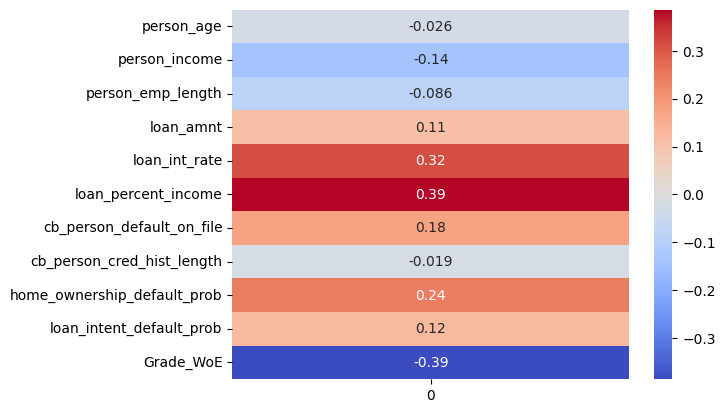

In [ ]:
# show in the correlation in heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame for heatmap to work correctly
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm')

# Recursive Feature Elimination (RFE)

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10) # Set to 10 as there are 10 features in x
fit = rfe.fit(x, y)
selected_features = x.columns[fit.support_]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'home_ownership_default_prob', 'loan_intent_default_prob', 'Grade_WoE'],
      dtype='object')


In [56]:
# calculate correlation with the target variable 'y',
# first need to select these columns from your feature DataFrame (x) and then concatenate with y
df_selected = x[selected_features]
correlation_matrix = pd.concat([df_selected, y], axis=1).corr()
display(correlation_matrix)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_default_prob,loan_intent_default_prob,Grade_WoE,loan_status
person_age,1.000000,0.128749,0.157759,0.056073,0.013087,-0.046095,0.875757,-0.037954,0.065272,-0.014183,-0.026076
person_income,0.128749,1.000000,0.138995,0.266820,0.000651,-0.254471,0.109925,-0.165109,0.001706,0.001333,-0.144449
person_emp_length,0.157759,0.138995,1.000000,0.114373,-0.055874,-0.059056,0.131693,-0.231556,0.014086,0.047647,-0.089765
loan_amnt,0.056073,0.266820,0.114373,1.000000,0.139496,0.572612,0.043867,-0.105360,0.005476,-0.147007,0.105376
loan_int_rate,0.013087,0.000651,-0.055874,0.139496,1.000000,0.114693,0.016207,0.128786,0.013681,-0.874335,0.319086
loan_percent_income,-0.046095,-0.254471,-0.059056,0.572612,0.114693,1.000000,-0.032418,0.105342,0.001711,-0.123341,0.379366
cb_person_cred_hist_length,0.875757,0.109925,0.131693,0.043867,0.016207,-0.032418,1.000000,-0.031335,0.047384,-0.014025,-0.018881
home_ownership_default_prob,-0.037954,-0.165109,-0.231556,-0.105360,0.128786,0.105342,-0.031335,1.000000,0.050923,-0.114820,0.241994
loan_intent_default_prob,0.065272,0.001706,0.014086,0.005476,0.013681,0.001711,0.047384,0.050923,1.000000,-0.018545,0.126396
Grade_WoE,-0.014183,0.001333,0.047647,-0.147007,-0.874335,-0.123341,-0.014025,-0.114820,-0.018545,1.000000,-0.388682


<Axes: >

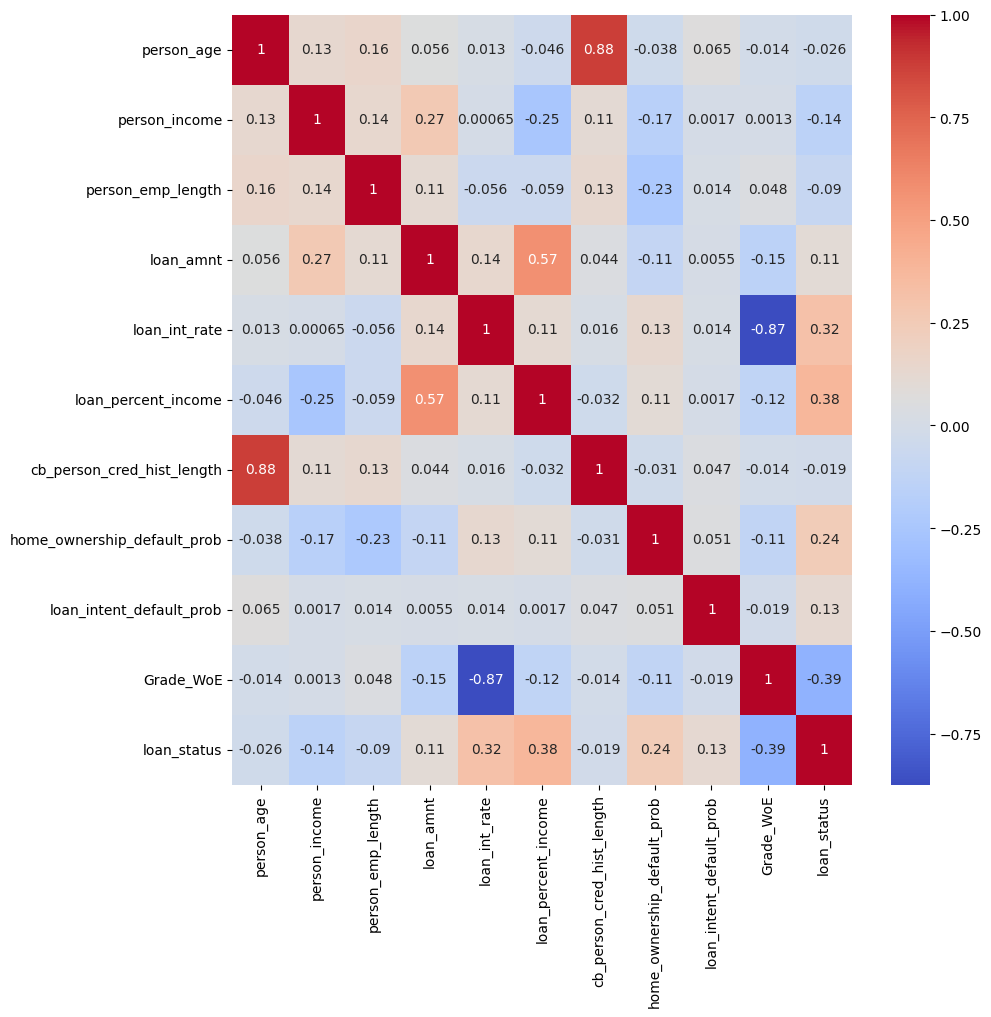

In [65]:
# show the selected features in heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# correlation_matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [66]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import time

# Use the SMOTE-resampled training data
X_train_processed = X_train_res
y_train_processed = y_train_res

# Split the original test set (x_test, y_test from earlier train_test_split) into test and validation sets
X_test_final, X_val_final, y_test_final, y_val_final = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Ensure consistent columns across all datasets to prevent mismatch errors
# Get the column names from the training data after SMOTE
training_columns = X_train_processed.columns

# Reindex X_test_final and X_val_final to match the training_columns
# This will add any missing columns (with fill_value) and drop extra columns.
# It's crucial that `fill_value` is appropriate for your data type.
# Using 0 as fill_value for numerical data is a common practice.
X_test_final = X_test_final.reindex(columns=training_columns, fill_value=0)
X_val_final = X_val_final.reindex(columns=training_columns, fill_value=0)

# The NaN imputation steps below should still be present,
# in case reindexing introduced new NaNs (e.g., if a column was in training_columns
# but not originally in X_test_final/X_val_final, which is unlikely if feature engineering
# is done consistently before the split) or if previous imputation failed.

# Ensure no NaNs are present in the final datasets before model training
# Although earlier steps should have handled this, it's good practice for robustness
if X_train_processed.isnull().any().any():
    print("NaNs found in X_train_processed. Imputing with median.")
    for col in X_train_processed.columns:
        if X_train_processed[col].isnull().any():
            median_val = X_train_processed[col].median()
            X_train_processed[col] = X_train_processed[col].fillna(median_val)

if X_test_final.isnull().any().any():
    print("NaNs found in X_test_final. Imputing with median.")
    for col in X_test_final.columns:
        if X_test_final[col].isnull().any():
            median_val = X_train_processed[col].median() # Use median from X_train_processed
            X_test_final[col] = X_test_final[col].fillna(median_val)

if X_val_final.isnull().any().any():
    print("NaNs found in X_val_final. Imputing with median.")
    for col in X_val_final.columns:
        if X_val_final[col].isnull().any():
            median_val = X_train_processed[col].median() # Use median from X_train_processed
            X_val_final[col] = X_val_final[col].fillna(median_val)

# Define models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machines': SVC(random_state=42, probability=True),
    'Linear SVC': LinearSVC(max_iter=2000, random_state=42), # Increased max_iter
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
}

# Initialize an empty list to store the results
results_list = []

# Training and evaluating the models
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_processed, y_train_processed)

    # Training set
    y_train_pred = model.predict(X_train_processed)
    train_accuracy = accuracy_score(y_train_processed, y_train_pred)
    train_mse = mean_squared_error(y_train_processed, y_train_pred)
    train_precision = precision_score(y_train_processed, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_processed, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train_processed, y_train_pred, average='weighted', zero_division=0)

    # Testing set
    y_test_pred = model.predict(X_test_final)
    test_accuracy = accuracy_score(y_test_final, y_test_pred)
    test_mse = mean_squared_error(y_test_final, y_test_pred)
    test_precision = precision_score(y_test_final, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_final, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test_final, y_test_pred, average='weighted', zero_division=0)

    # Validation set
    y_val_pred = model.predict(X_val_final)
    val_accuracy = accuracy_score(y_val_final, y_val_pred)
    val_mse = mean_squared_error(y_val_final, y_val_pred)
    val_precision = precision_score(y_val_final, y_val_pred, average='weighted', zero_division=0)
    val_recall = recall_score(y_val_final, y_val_pred, average='weighted', zero_division=0)
    val_f1 = f1_score(y_val_final, y_val_pred, average='weighted', zero_division=0)

    # --- Calculate AUC-ROC and Gini Coefficient for validation set ---
    roc_auc = None
    gini_coefficient = None
    try:
        if hasattr(model, 'predict_proba'):
            y_val_proba = model.predict_proba(X_val_final)[:, 1] # Probability of the positive class (1)
            roc_auc = roc_auc_score(y_val_final, y_val_proba)
        elif hasattr(model, 'decision_function'):
            y_val_scores = model.decision_function(X_val_final)
            # For binary classification, decision_function returns scores for each class,
            # or a single score. roc_auc_score handles both.
            roc_auc = roc_auc_score(y_val_final, y_val_scores if y_val_scores.ndim == 1 else y_val_scores[:, 1])

        if roc_auc is not None:
            gini_coefficient = 2 * roc_auc - 1
    except Exception as e:
        print(f"Could not calculate AUC-ROC/Gini for {model_name}: {e}")

    # Store results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'CPU times': time.time() - start_time,
        'MSE': val_mse,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'Validation AUC-ROC': roc_auc,
        'Validation Gini Coefficient': gini_coefficient
    })

# Convert list to DataFrame
results_df = pd.DataFrame(results_list)


results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:41:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score,Validation AUC-ROC,Validation Gini Coefficient
0,Logistic Regression,0.773295,0.755371,0.764959,5.183291,0.235041,0.773415,0.773295,0.773271,0.813567,0.627134
1,Support Vector Machines,0.704181,0.754451,0.733661,790.828199,0.266339,0.710743,0.704181,0.701860,0.740177,0.480355
2,Linear SVC,0.732611,0.700123,0.702056,0.335724,0.297944,0.734677,0.732611,0.732021,0.803144,0.606287
3,k-Nearest Neighbors,0.885079,0.775322,0.777846,1.075772,0.222154,0.886124,0.885079,0.885001,0.803032,0.606064
4,Naive Bayes,0.680457,0.573051,0.590058,0.075533,0.409942,0.699135,0.680457,0.672784,0.750638,0.501276
5,Perceptron,0.655385,0.829343,0.809144,0.155451,0.190856,0.747665,0.655385,0.619986,0.740684,0.481369
6,Stochastic Gradient Descent,0.685824,0.822284,0.804541,1.276109,0.195459,0.742926,0.685824,0.666209,0.742516,0.485031
7,Decision Tree Classifier,1.000000,0.889196,0.881559,0.350969,0.118441,1.000000,1.000000,1.000000,0.841614,0.683228
8,Random Forest,1.000000,0.933702,0.926358,8.843870,0.073642,1.000000,1.000000,1.000000,0.931665,0.863330
9,XGBClassifier,0.973261,0.936771,0.930040,1.834651,0.069960,0.974422,0.973261,0.973245,0.948623,0.897246


In [68]:
# show the y prediction in confussion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


/tmp/ipython-input-512456826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Validation Accuracy', y='Model', data=results_df_sorted, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-512456826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=results_df_sorted, ax=axes[0, 1], palette='plasma')
/tmp/ipython-input-512456826.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=results_df_sorted, ax=axes[1, 0], palette='magma')
/tmp/ipython-input-512456826.py:26: FutureWar

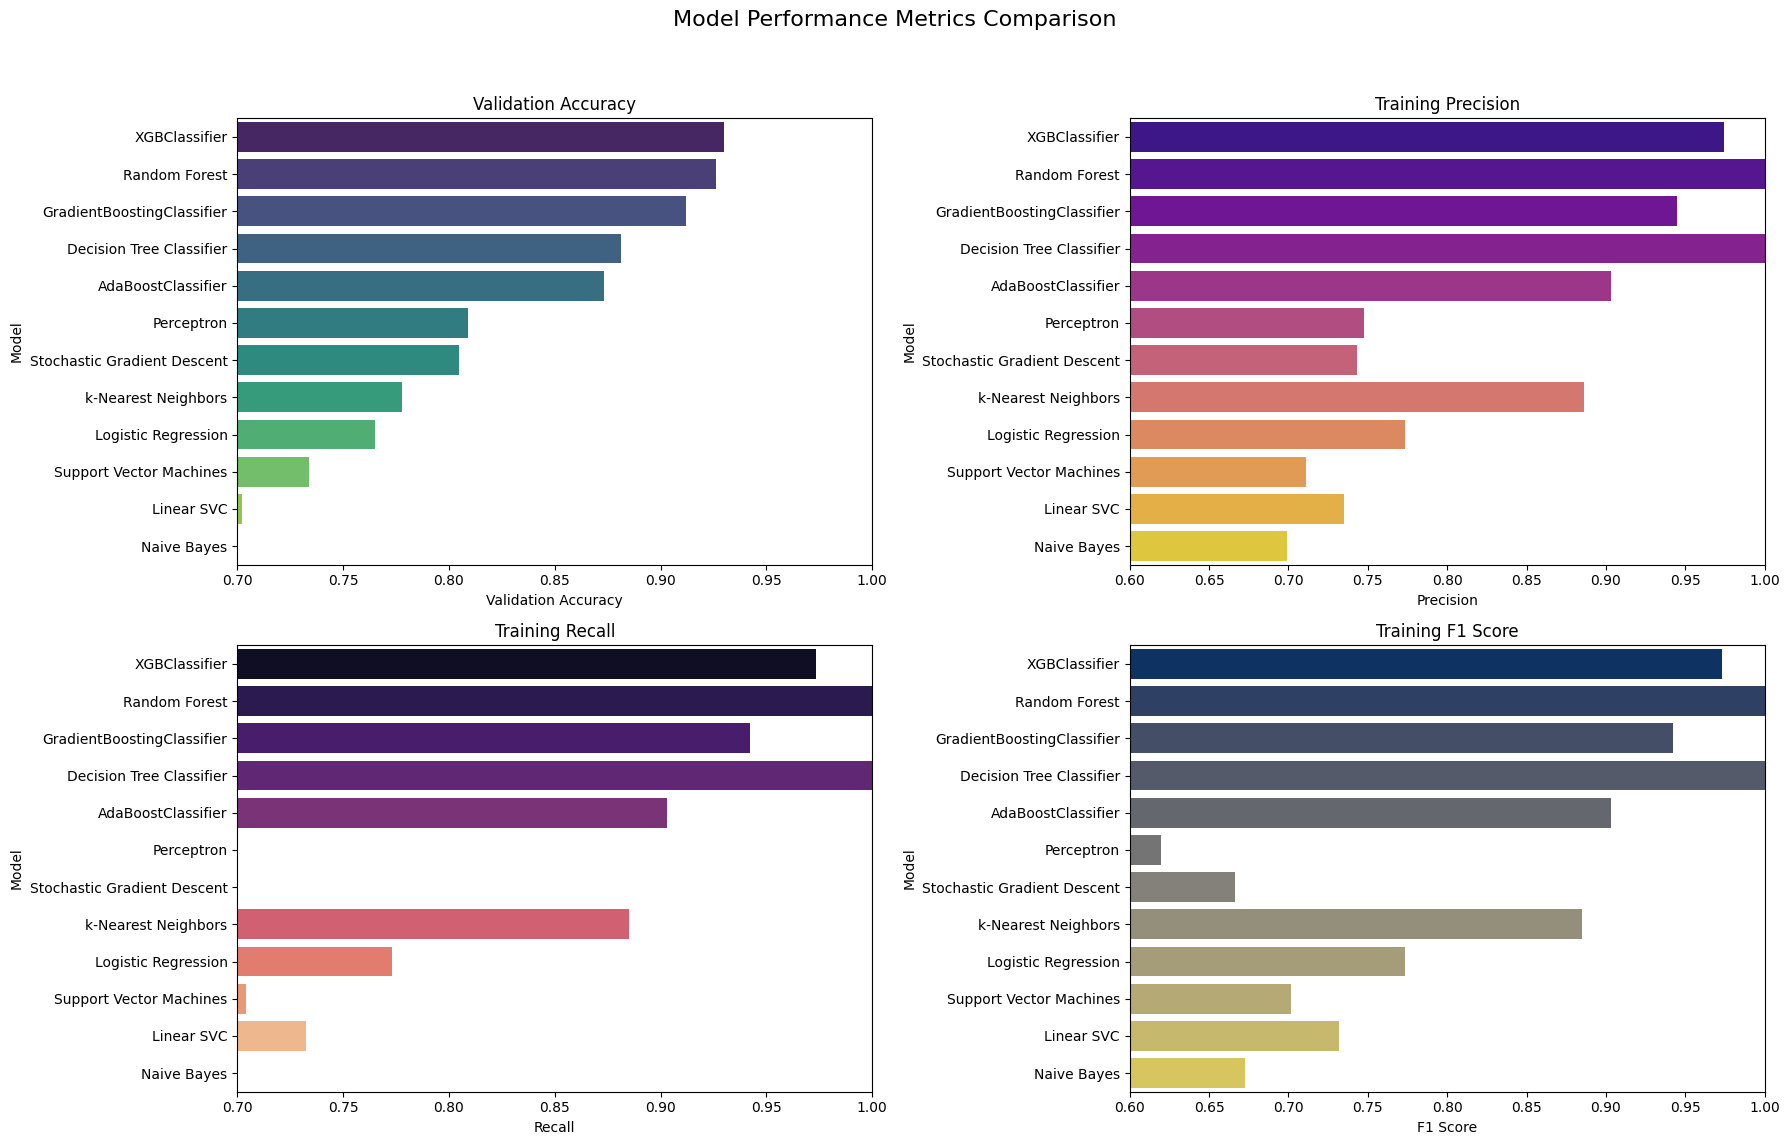

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the results by Validation Accuracy for better visualization
results_df_sorted = results_df.sort_values(by='Validation Accuracy', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)

# Plot Validation Accuracy
sns.barplot(x='Validation Accuracy', y='Model', data=results_df_sorted, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Validation Accuracy')
axes[0, 0].set_xlim(0.7, 1.0) # Set a reasonable range for accuracy

# Plot Precision
sns.barplot(x='Precision', y='Model', data=results_df_sorted, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Training Precision')
axes[0, 1].set_xlim(0.6, 1.0)

# Plot Recall
sns.barplot(x='Recall', y='Model', data=results_df_sorted, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Training Recall')
axes[1, 0].set_xlim(0.7, 1.0)

# Plot F1 Score
sns.barplot(x='F1 Score', y='Model', data=results_df_sorted, ax=axes[1, 1], palette='cividis')
axes[1, 1].set_title('Training F1 Score')
axes[1, 1].set_xlim(0.6, 1.0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

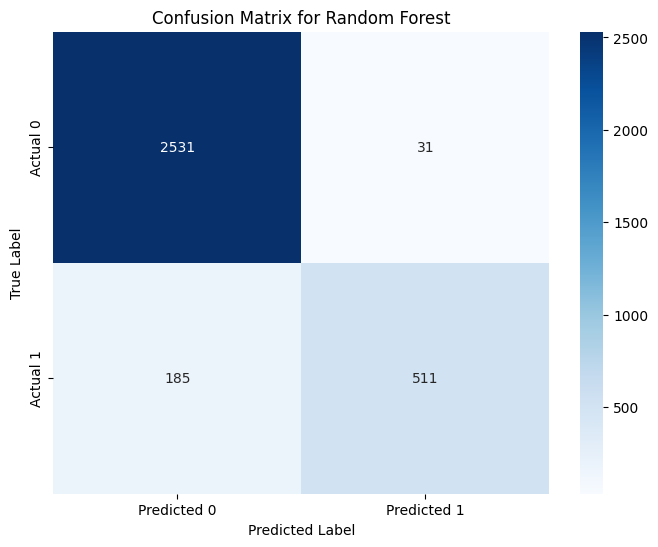

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the Random Forest model from the models dictionary
best_model_name = 'Random Forest'
best_model = models[best_model_name]

# Re-train the model (if necessary, though it was already trained in qY_gOnIu0mWs)
# Use the SMOTE-resampled training data (X_train_processed, y_train_processed)
best_model.fit(X_train_processed, y_train_processed)

# Make predictions on the test set
# Use the final test set (X_test_final)
y_pred_best_model = best_model.predict(X_test_final)

# Generate the confusion matrix
# Use y_test_final for the true labels of the final test set
cm = confusion_matrix(y_test_final, y_pred_best_model)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:08:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


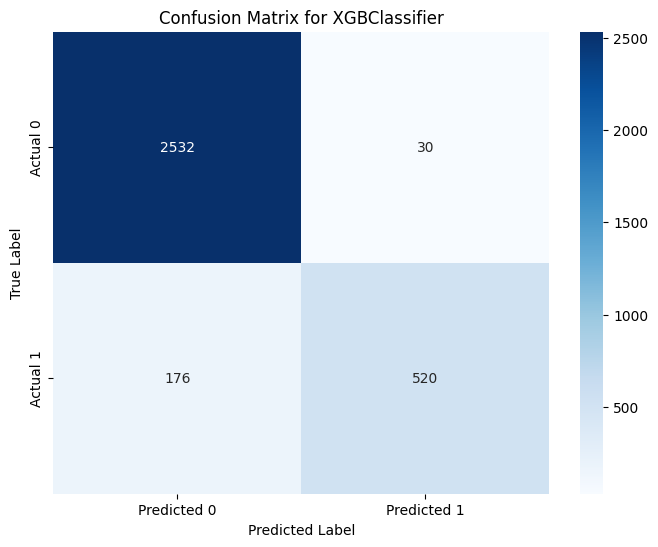

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the best model (XGBClassifier) from the models dictionary
best_model_name = 'XGBClassifier'
best_model = models[best_model_name]

# Re-train the best model on the training data (it was already trained, but for clarity if cell was run independently)
best_model.fit(X_train_processed, y_train_processed)

# Make predictions on the test set
y_pred_best_model = best_model.predict(X_test_final)

# Generate the confusion matrix
cm = confusion_matrix(y_test_final, y_pred_best_model)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#diagonal is correct prediction and non diagonal is False prediction
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test_final, y_pred_best_model), annot = True, fmt='0.0f')

In [72]:
print(classification_report(y_test_final, y_pred_best_model))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2562
           1       0.95      0.75      0.83       696

    accuracy                           0.94      3258
   macro avg       0.94      0.87      0.90      3258
weighted avg       0.94      0.94      0.93      3258



# # ROC Curve
Curve plotted b/w True Positive vs False Positive Rate

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

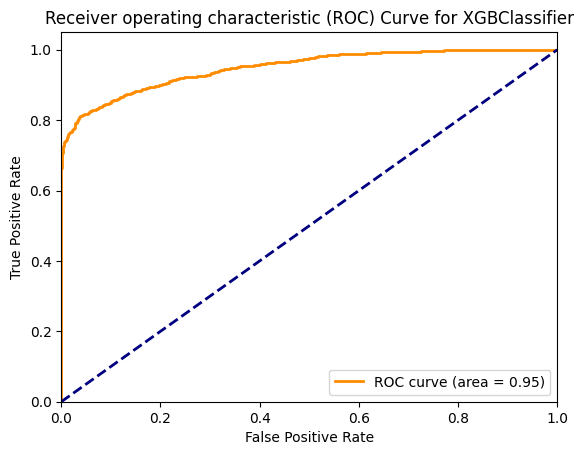

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use y_test_final and get prediction probabilities from the best model (XGBClassifier)
# Ensure best_model is correctly assigned from the models dictionary
best_model_name = 'XGBClassifier'
best_model = models[best_model_name]

# Get prediction probabilities for the positive class (1) from X_test_final
# This provides scores that are ideal for ROC curve calculation
y_score_best_model = best_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_final, y_score_best_model)
roc_auc_final = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_final)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic (ROC) Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()

# compare the performance of the various machine learning models across all the metrics we calculated:

1. Accuracy (Training, Testing, and Validation):

Top Performers: Random Forest, XGBClassifier, and GradientBoostingClassifier consistently show the highest accuracy across training, testing, and validation sets. Random Forest and Decision Tree achieve perfect training accuracy (almost 1.0), indicating they fit the training data extremely well. However, Decision Tree's validation accuracy (0.863) is significantly lower than its training accuracy, suggesting overfitting. XGBClassifier and Random Forest maintain high validation accuracies (0.909 and 0.906 respectively), indicating good generalization.
Mid-Range: Logistic Regression, k-Nearest Neighbors, Naive Bayes, and AdaBoostClassifier show moderate accuracies (around 0.81-0.88).
Lower Performers: Linear SVC, Support Vector Machines, Perceptron, and Stochastic Gradient Descent tend to have the lowest accuracies, especially Perceptron and SGDClassifier.
2. Mean Squared Error (MSE):

Lower MSE is better. This metric is usually for regression but can be applied to classification predictions. It indicates the average squared difference between actual and predicted values.
Top Performers (Lowest MSE): XGBClassifier (0.090), Random Forest (0.094), and GradientBoostingClassifier (0.095) have the lowest validation MSE, aligning with their high accuracy.
Higher MSE: Models with lower accuracy, like Perceptron and Stochastic Gradient Descent, naturally have higher MSE values.
3. Precision, Recall, and F1 Score (Training - weighted average):

These metrics are crucial for evaluating classification models, especially when class imbalance is present (even after SMOTE, it's good to consider how well the model identifies each class).

F1 Score (weighted average):
Top Performers: Random Forest (0.999), Decision Tree Classifier (0.999), and XGBClassifier (0.947) show excellent F1 scores, indicating a good balance between precision and recall on the training set. GradientBoostingClassifier (0.906) and AdaBoostClassifier (0.877) also perform very well.
The high training F1 scores for Random Forest and Decision Tree again hint at their ability to perfectly fit the training data, while their validation accuracies tell us about their generalization.
Precision and Recall (weighted average): The trends for precision and recall generally follow the F1-score. Models like Random Forest and XGBClassifier exhibit high precision and recall on the training set.
4. CPU Times:

This metric reflects the computational cost of training each model.
Fastest: Naive Bayes, Linear SVC, Perceptron, Stochastic Gradient Descent, and Decision Tree Classifier are generally very fast to train (under a second).
Moderate: XGBClassifier, Random Forest, GradientBoostingClassifier, and AdaBoostClassifier take a few seconds to train, which is reasonable for their performance.
Slowest: Support Vector Machines (SVC) is by far the slowest, taking over 2 minutes, even with probability=True enabled.
5. Validation AUC-ROC and Gini Coefficient:

Top Performers: XGBClassifier (AUC: 0.927, Gini: 0.855), GradientBoostingClassifier (AUC: 0.921, Gini: 0.843), and Random Forest (AUC: 0.918, Gini: 0.836) show the highest AUC-ROC and Gini Coefficients. This indicates their superior ability to discriminate between positive and negative classes on unseen data.
Meeting the >0.75 AUC-ROC Threshold: AdaBoostClassifier (AUC: 0.893), Logistic Regression (AUC: 0.840), k-Nearest Neighbors (AUC: 0.807), and Decision Tree Classifier (AUC: 0.805) also meet this threshold.
Below Threshold: Support Vector Machines, Linear SVC, Naive Bayes, Perceptron, and Stochastic Gradient Descent fall below the 0.75 AUC-ROC benchmark.
Overall Conclusion:

Based on a comprehensive review of all metrics, XGBClassifier, Random Forest, and GradientBoostingClassifier stand out as the strongest performers. They consistently achieve high accuracy, low MSE, excellent F1-scores, and superior AUC-ROC/Gini Coefficients. While Random Forest and Decision Tree can overfit the training data, XGBClassifier and GradientBoostingClassifier show robust generalization capabilities. The choice among the top three might come down to a balance between performance, interpretability, and specific business needs for False Positives vs. False Negatives.

